# Big Data Analytics of Hotel Bookings

### Data Import

In [1]:
# import modules
import pandas as pd
from pyspark.sql import SparkSession

In [2]:
# build spark session and spark context
spark = SparkSession.builder \
        .appName("hotel") \
        .getOrCreate()
sc = spark.sparkContext

In [3]:
df = spark.read.csv('hotel_bookings.csv',  inferSchema=True, header = True)
df.take(2)

[Row(hotel='Resort Hotel', is_canceled=0, lead_time=342, arrival_date_year=2015, arrival_date_month='July', arrival_date_week_number=27, arrival_date_day_of_month=1, stays_in_weekend_nights=0, stays_in_week_nights=0, adults=2, children='0', babies=0, meal='BB', country='PRT', market_segment='Direct', distribution_channel='Direct', is_repeated_guest=0, previous_cancellations=0, previous_bookings_not_canceled=0, reserved_room_type='C', assigned_room_type='C', booking_changes=3, deposit_type='No Deposit', agent='NULL', company='NULL', days_in_waiting_list=0, customer_type='Transient', adr=0.0, required_car_parking_spaces=0, total_of_special_requests=0, reservation_status='Check-Out', reservation_status_date='2015-07-01'),
 Row(hotel='Resort Hotel', is_canceled=0, lead_time=737, arrival_date_year=2015, arrival_date_month='July', arrival_date_week_number=27, arrival_date_day_of_month=1, stays_in_weekend_nights=0, stays_in_week_nights=0, adults=2, children='0', babies=0, meal='BB', country='

In [4]:
# view columns and schema
df.printSchema()

root
 |-- hotel: string (nullable = true)
 |-- is_canceled: integer (nullable = true)
 |-- lead_time: integer (nullable = true)
 |-- arrival_date_year: integer (nullable = true)
 |-- arrival_date_month: string (nullable = true)
 |-- arrival_date_week_number: integer (nullable = true)
 |-- arrival_date_day_of_month: integer (nullable = true)
 |-- stays_in_weekend_nights: integer (nullable = true)
 |-- stays_in_week_nights: integer (nullable = true)
 |-- adults: integer (nullable = true)
 |-- children: string (nullable = true)
 |-- babies: integer (nullable = true)
 |-- meal: string (nullable = true)
 |-- country: string (nullable = true)
 |-- market_segment: string (nullable = true)
 |-- distribution_channel: string (nullable = true)
 |-- is_repeated_guest: integer (nullable = true)
 |-- previous_cancellations: integer (nullable = true)
 |-- previous_bookings_not_canceled: integer (nullable = true)
 |-- reserved_room_type: string (nullable = true)
 |-- assigned_room_type: string (nullab

### Data Preprocessing

In [5]:
# replace the strings "NULL" and "NA" with null value
df_withNull = df.replace('NULL', None).replace('NA', None)

# view number of null values per column
from pyspark.sql.functions import isnan, when, count, col
df_withNull.select([count(when(col(c).isNull(), c)).alias(c) for c in df_withNull.columns]).show()

+-----+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+-----+-------+--------------------+-------------+---+---------------------------+-------------------------+------------------+-----------------------+
|hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|market_segment|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|agent|company|days_in_waiting_list|customer_type|adr|required_car_parking_spaces|total_of_special_reque

In [6]:
# replace null values in 'children' to 0 since there are only 4
df2 = df_withNull.fillna({'children':0})

# replace 'children' datatype to int
df2 = df2.withColumn('children', col('children').cast("Int"))

In [7]:
# drop 'company' and 'agent' due to high null count
df2 = df2.drop('agent', 'company','country', 'arrival_date_week_number')

In [8]:
df2.dtypes

[('hotel', 'string'),
 ('is_canceled', 'int'),
 ('lead_time', 'int'),
 ('arrival_date_year', 'int'),
 ('arrival_date_month', 'string'),
 ('arrival_date_day_of_month', 'int'),
 ('stays_in_weekend_nights', 'int'),
 ('stays_in_week_nights', 'int'),
 ('adults', 'int'),
 ('children', 'int'),
 ('babies', 'int'),
 ('meal', 'string'),
 ('market_segment', 'string'),
 ('distribution_channel', 'string'),
 ('is_repeated_guest', 'int'),
 ('previous_cancellations', 'int'),
 ('previous_bookings_not_canceled', 'int'),
 ('reserved_room_type', 'string'),
 ('assigned_room_type', 'string'),
 ('booking_changes', 'int'),
 ('deposit_type', 'string'),
 ('days_in_waiting_list', 'int'),
 ('customer_type', 'string'),
 ('adr', 'double'),
 ('required_car_parking_spaces', 'int'),
 ('total_of_special_requests', 'int'),
 ('reservation_status', 'string'),
 ('reservation_status_date', 'string')]

In [9]:
df2.groupBy('arrival_date_month').count().show()

+------------------+-----+
|arrival_date_month|count|
+------------------+-----+
|              July|12661|
|          November| 6794|
|          February| 8068|
|           January| 5929|
|             March| 9794|
|           October|11160|
|               May|11791|
|            August|13877|
|             April|11089|
|              June|10939|
|          December| 6780|
|         September|10508|
+------------------+-----+



In [10]:
#month_num = df2.replace('January', '1')\
#                .replace('February', '2')\
#                .replace('March', '3')\
#                .replace('April', '4')\
#                .replace('May', '5')\
#                .replace('June', '6')



In [11]:
#month_num = month_num.replace('July', '7')\
#                      .replace('August', '8')\
#                .replace('September', '9')\
#                .replace('October', '10')\
#                .replace('November', '11')\
#                .replace('December', '12')



**Data Preprocessing Todo's**
- map arrival_date_month from strings to numbers: so "January" = 1, etc.
- numerically encode all the other string variables, otherwise remove them  

In [12]:
# numerically encode arrival_date_month
#done in next cell?

In [13]:
#numerically encode all columns of type string

from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, OneHotEncoderModel, StringIndexer


col_string=['hotel', 'arrival_date_month','meal','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status','reservation_status_date']
col_num=[x+"_NUMERIC" for x in col_string]

#add other columns for encoding
col_num=col_num+['arrival_date_year','arrival_date_day_of_month']

col_oh=[x+"_oh" for x in col_string]

col_oh=col_oh+['arrival_date_year_oh','arrival_date_day_of_month_oh']

In [14]:
indexers = [StringIndexer(inputCol=column, outputCol=column+"_NUMERIC").fit(df2) for column in col_string]
pipeline = Pipeline(stages=indexers)
df_indexed = pipeline.fit(df2).transform(df2)

In [15]:
df_indexed.dtypes

[('hotel', 'string'),
 ('is_canceled', 'int'),
 ('lead_time', 'int'),
 ('arrival_date_year', 'int'),
 ('arrival_date_month', 'string'),
 ('arrival_date_day_of_month', 'int'),
 ('stays_in_weekend_nights', 'int'),
 ('stays_in_week_nights', 'int'),
 ('adults', 'int'),
 ('children', 'int'),
 ('babies', 'int'),
 ('meal', 'string'),
 ('market_segment', 'string'),
 ('distribution_channel', 'string'),
 ('is_repeated_guest', 'int'),
 ('previous_cancellations', 'int'),
 ('previous_bookings_not_canceled', 'int'),
 ('reserved_room_type', 'string'),
 ('assigned_room_type', 'string'),
 ('booking_changes', 'int'),
 ('deposit_type', 'string'),
 ('days_in_waiting_list', 'int'),
 ('customer_type', 'string'),
 ('adr', 'double'),
 ('required_car_parking_spaces', 'int'),
 ('total_of_special_requests', 'int'),
 ('reservation_status', 'string'),
 ('reservation_status_date', 'string'),
 ('hotel_NUMERIC', 'double'),
 ('arrival_date_month_NUMERIC', 'double'),
 ('meal_NUMERIC', 'double'),
 ('market_segment_NUMER

In [16]:
#one-hot encode all columns in col_num

ohe = OneHotEncoder(dropLast=False)
ohe.setInputCols(col_num)
ohe.setOutputCols(col_oh)
model = ohe.fit(df_indexed)

df_casted=model.transform(df_indexed)


In [17]:
df_casted.dtypes

[('hotel', 'string'),
 ('is_canceled', 'int'),
 ('lead_time', 'int'),
 ('arrival_date_year', 'int'),
 ('arrival_date_month', 'string'),
 ('arrival_date_day_of_month', 'int'),
 ('stays_in_weekend_nights', 'int'),
 ('stays_in_week_nights', 'int'),
 ('adults', 'int'),
 ('children', 'int'),
 ('babies', 'int'),
 ('meal', 'string'),
 ('market_segment', 'string'),
 ('distribution_channel', 'string'),
 ('is_repeated_guest', 'int'),
 ('previous_cancellations', 'int'),
 ('previous_bookings_not_canceled', 'int'),
 ('reserved_room_type', 'string'),
 ('assigned_room_type', 'string'),
 ('booking_changes', 'int'),
 ('deposit_type', 'string'),
 ('days_in_waiting_list', 'int'),
 ('customer_type', 'string'),
 ('adr', 'double'),
 ('required_car_parking_spaces', 'int'),
 ('total_of_special_requests', 'int'),
 ('reservation_status', 'string'),
 ('reservation_status_date', 'string'),
 ('hotel_NUMERIC', 'double'),
 ('arrival_date_month_NUMERIC', 'double'),
 ('meal_NUMERIC', 'double'),
 ('market_segment_NUMER

In [18]:
#check oh encoded df_casted
df_casted.groupBy('booking_changes').count().show()

+---------------+------+
|booking_changes| count|
+---------------+------+
|             12|     2|
|              1| 12701|
|             13|     5|
|              6|    63|
|             16|     2|
|              3|   927|
|             20|     1|
|              5|   118|
|             15|     3|
|             17|     2|
|              9|     8|
|              4|   376|
|              8|    17|
|              7|    31|
|             10|     6|
|             21|     1|
|             11|     2|
|             14|     5|
|              2|  3805|
|              0|101314|
+---------------+------+
only showing top 20 rows



In [19]:
df_casted.groupBy('arrival_date_year_oh').count().show()

+--------------------+-----+
|arrival_date_year_oh|count|
+--------------------+-----+
| (2018,[2017],[1.0])|40687|
| (2018,[2015],[1.0])|21996|
| (2018,[2016],[1.0])|56707|
+--------------------+-----+



In [20]:
df_casted.groupBy('arrival_date_day_of_month_oh').count().show()

+----------------------------+-----+
|arrival_date_day_of_month_oh|count|
+----------------------------+-----+
|             (32,[17],[1.0])| 4406|
|             (32,[14],[1.0])| 3819|
|              (32,[3],[1.0])| 3855|
|             (32,[10],[1.0])| 3575|
|              (32,[4],[1.0])| 3763|
|             (32,[25],[1.0])| 4160|
|             (32,[27],[1.0])| 3802|
|             (32,[29],[1.0])| 3580|
|             (32,[21],[1.0])| 3767|
|             (32,[19],[1.0])| 4052|
|             (32,[15],[1.0])| 4196|
|              (32,[9],[1.0])| 4096|
|             (32,[31],[1.0])| 2208|
|             (32,[13],[1.0])| 3745|
|             (32,[28],[1.0])| 3946|
|             (32,[24],[1.0])| 3993|
|              (32,[6],[1.0])| 3833|
|             (32,[11],[1.0])| 3599|
|             (32,[18],[1.0])| 4002|
|             (32,[22],[1.0])| 3596|
+----------------------------+-----+
only showing top 20 rows



In [21]:
df_encoded=df_casted.drop(*col_string)
df_encoded=df_encoded.drop(*col_num)

In [22]:
df_encoded.dtypes

[('is_canceled', 'int'),
 ('lead_time', 'int'),
 ('stays_in_weekend_nights', 'int'),
 ('stays_in_week_nights', 'int'),
 ('adults', 'int'),
 ('children', 'int'),
 ('babies', 'int'),
 ('is_repeated_guest', 'int'),
 ('previous_cancellations', 'int'),
 ('previous_bookings_not_canceled', 'int'),
 ('booking_changes', 'int'),
 ('days_in_waiting_list', 'int'),
 ('adr', 'double'),
 ('required_car_parking_spaces', 'int'),
 ('total_of_special_requests', 'int'),
 ('distribution_channel_oh', 'vector'),
 ('customer_type_oh', 'vector'),
 ('reservation_status_date_oh', 'vector'),
 ('arrival_date_day_of_month_oh', 'vector'),
 ('reservation_status_oh', 'vector'),
 ('market_segment_oh', 'vector'),
 ('reserved_room_type_oh', 'vector'),
 ('assigned_room_type_oh', 'vector'),
 ('meal_oh', 'vector'),
 ('hotel_oh', 'vector'),
 ('deposit_type_oh', 'vector'),
 ('arrival_date_year_oh', 'vector'),
 ('arrival_date_month_oh', 'vector')]

In [23]:
df_encoded.groupBy('arrival_date_month_oh').count().show()

+---------------------+-----+
|arrival_date_month_oh|count|
+---------------------+-----+
|       (12,[0],[1.0])|13877|
|       (12,[9],[1.0])| 6794|
|       (12,[8],[1.0])| 8068|
|      (12,[10],[1.0])| 6780|
|       (12,[1],[1.0])|12661|
|       (12,[4],[1.0])|11089|
|       (12,[3],[1.0])|11160|
|       (12,[6],[1.0])|10508|
|       (12,[5],[1.0])|10939|
|       (12,[2],[1.0])|11791|
|       (12,[7],[1.0])| 9794|
|      (12,[11],[1.0])| 5929|
+---------------------+-----+



In [24]:
df_encoded.show(2)

+-----------+---------+-----------------------+--------------------+------+--------+------+-----------------+----------------------+------------------------------+---------------+--------------------+---+---------------------------+-------------------------+-----------------------+----------------+--------------------------+----------------------------+---------------------+-----------------+---------------------+---------------------+-------------+-------------+---------------+--------------------+---------------------+
|is_canceled|lead_time|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|booking_changes|days_in_waiting_list|adr|required_car_parking_spaces|total_of_special_requests|distribution_channel_oh|customer_type_oh|reservation_status_date_oh|arrival_date_day_of_month_oh|reservation_status_oh|market_segment_oh|reserved_room_type_oh|assigned_room_type_oh|      meal_oh|     hotel_oh|deposi

In [25]:
columns_ = df_encoded.columns
columns_

['is_canceled',
 'lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'distribution_channel_oh',
 'customer_type_oh',
 'reservation_status_date_oh',
 'arrival_date_day_of_month_oh',
 'reservation_status_oh',
 'market_segment_oh',
 'reserved_room_type_oh',
 'assigned_room_type_oh',
 'meal_oh',
 'hotel_oh',
 'deposit_type_oh',
 'arrival_date_year_oh',
 'arrival_date_month_oh']

In [26]:
from pyspark.ml.feature import Normalizer
from pyspark.ml.linalg import Vectors

df_encoded=df_casted.drop(*col_string)
df_encoded=df_encoded.drop(*col_num)

#columns of all vector type data that are going to be normalied 
columns_ = ['distribution_channel_oh',
 'customer_type_oh',
 'reservation_status_date_oh',
 'arrival_date_day_of_month_oh',
 'reservation_status_oh',
 'market_segment_oh',
 'reserved_room_type_oh',
 'assigned_room_type_oh',
 'meal_oh',
 'hotel_oh',
 'deposit_type_oh',
 'arrival_date_year_oh',
 'arrival_date_month_oh']


#normalizing all vector type data with l^1 norm
for column in columns_:
    normalizer = Normalizer(inputCol=column, outputCol=column+"_NORM", p=1.0) 
    l1NormData = normalizer.transform(df_encoded)
    df_encoded = l1NormData
l1NormData = df_encoded
print("Normalized using L^1 norm")

l1NormData = l1NormData.drop(*columns_)
#l1NormData.show()

Normalized using L^1 norm


In [27]:
l1NormData.dtypes

[('is_canceled', 'int'),
 ('lead_time', 'int'),
 ('stays_in_weekend_nights', 'int'),
 ('stays_in_week_nights', 'int'),
 ('adults', 'int'),
 ('children', 'int'),
 ('babies', 'int'),
 ('is_repeated_guest', 'int'),
 ('previous_cancellations', 'int'),
 ('previous_bookings_not_canceled', 'int'),
 ('booking_changes', 'int'),
 ('days_in_waiting_list', 'int'),
 ('adr', 'double'),
 ('required_car_parking_spaces', 'int'),
 ('total_of_special_requests', 'int'),
 ('distribution_channel_oh_NORM', 'vector'),
 ('customer_type_oh_NORM', 'vector'),
 ('reservation_status_date_oh_NORM', 'vector'),
 ('arrival_date_day_of_month_oh_NORM', 'vector'),
 ('reservation_status_oh_NORM', 'vector'),
 ('market_segment_oh_NORM', 'vector'),
 ('reserved_room_type_oh_NORM', 'vector'),
 ('assigned_room_type_oh_NORM', 'vector'),
 ('meal_oh_NORM', 'vector'),
 ('hotel_oh_NORM', 'vector'),
 ('deposit_type_oh_NORM', 'vector'),
 ('arrival_date_year_oh_NORM', 'vector'),
 ('arrival_date_month_oh_NORM', 'vector')]

In [28]:
# convert to RDD
# data_rdd = df2.rdd

data_rdd = df_encoded.rdd

seed = 42

# 70/30 test train split
train, test = data_rdd.randomSplit([0.7, 0.3], seed)

### Exploratory Data Analysis

In [29]:
import matplotlib.pyplot as plt 
from pyspark.sql.functions import *
import pyspark.sql.functions as f
import numpy as np

In [167]:
#average daily rate: defined by dividing the sum of all lodging transactions by the total number of staying nights
#Number of stays in the weekday/weekend
#lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
df2.select(['adr','stays_in_weekend_nights', 'stays_in_week_nights', 'lead_time']).describe().show()

+-------+------------------+-----------------------+--------------------+------------------+
|summary|               adr|stays_in_weekend_nights|stays_in_week_nights|         lead_time|
+-------+------------------+-----------------------+--------------------+------------------+
|  count|            119390|                 119390|              119390|            119390|
|   mean|101.83112153446453|     0.9275986263506156|   2.500301532791691|104.01141636652986|
| stddev| 50.53579028554864|     0.9986134945978816|  1.9082856150479093|106.86309704798747|
|    min|             -6.38|                      0|                   0|                 0|
|    max|            5400.0|                     19|                  50|               737|
+-------+------------------+-----------------------+--------------------+------------------+



In [169]:
#Whether patrons/customers were adults with children
df2.select(['adults', 'children', 'babies']).describe().show()

+-------+------------------+-------------------+--------------------+
|summary|            adults|           children|              babies|
+-------+------------------+-------------------+--------------------+
|  count|            119390|             119390|              119390|
|   mean|1.8564033838679956|0.10388642264846303|0.007948739425412514|
| stddev|0.5792609988327523| 0.3985552216824472| 0.09743619130126377|
|    min|                 0|                  0|                   0|
|    max|                55|                 10|                  10|
+-------+------------------+-------------------+--------------------+



In [31]:
#Indication on if the customer made a deposit to guarantee the booking.
#No Deposit – no deposit was made
#Non Refund – a deposit was made in the value of the total stay cost
#Refundable – a deposit was made with a value under the total cost of stay.

df2.groupBy("deposit_type", 'hotel', 'is_canceled').avg('adr').sort("deposit_type", 'hotel', 'is_canceled').show()

+------------+------------+-----------+------------------+
|deposit_type|       hotel|is_canceled|          avg(adr)|
+------------+------------+-----------+------------------+
|  No Deposit|  City Hotel|          0|105.75264665136447|
|  No Deposit|  City Hotel|          1|112.00739824145559|
|  No Deposit|Resort Hotel|          0| 90.93364290932067|
|  No Deposit|Resort Hotel|          1|112.77001693121677|
|  Non Refund|  City Hotel|          0| 99.77833333333335|
|  Non Refund|  City Hotel|          1| 93.12289551541632|
|  Non Refund|Resort Hotel|          0|  69.8572463768116|
|  Non Refund|Resort Hotel|          1| 66.07261818181843|
|  Refundable|  City Hotel|          0| 78.04166666666667|
|  Refundable|  City Hotel|          1|130.80714285714285|
|  Refundable|Resort Hotel|          0| 68.16483333333333|
|  Refundable|Resort Hotel|          1| 84.84772727272728|
+------------+------------+-----------+------------------+



In [32]:
df2.groupBy("deposit_type", 'is_canceled').count().sort("deposit_type").show()

+------------+-----------+-----+
|deposit_type|is_canceled|count|
+------------+-----------+-----+
|  No Deposit|          1|29694|
|  No Deposit|          0|74947|
|  Non Refund|          1|14494|
|  Non Refund|          0|   93|
|  Refundable|          1|   36|
|  Refundable|          0|  126|
+------------+-----------+-----+



In [33]:
#check count of cancellations for deposit type
df2.groupBy("deposit_type", 'hotel', 'is_canceled').count().sort("deposit_type", 'hotel', 'is_canceled').show()

+------------+------------+-----------+-----+
|deposit_type|       hotel|is_canceled|count|
+------------+------------+-----------+-----+
|  No Deposit|  City Hotel|          0|46198|
|  No Deposit|  City Hotel|          1|20244|
|  No Deposit|Resort Hotel|          0|28749|
|  No Deposit|Resort Hotel|          1| 9450|
|  Non Refund|  City Hotel|          0|   24|
|  Non Refund|  City Hotel|          1|12844|
|  Non Refund|Resort Hotel|          0|   69|
|  Non Refund|Resort Hotel|          1| 1650|
|  Refundable|  City Hotel|          0|    6|
|  Refundable|  City Hotel|          1|   14|
|  Refundable|Resort Hotel|          0|  120|
|  Refundable|Resort Hotel|          1|   22|
+------------+------------+-----------+-----+



It appears that bookings that were made with no deposit, it is more likely for patrons to cancel their bookings. This makes sense as there is no punitive action or monetary loss if they choose to cancel their reservation. This is more likely to also occur for city hotels.

For those that required non-refundable deposits, one would think that it makes sense for customers to be making their reservations more conservatively and wisely. Surprisingly, we find that cancellations for these types of bookings occurred more frequently than bookings that provided refundable deposits. When broken down by hotel type, again we see that majority (~10k more) of cancellations were for city hotels. Perhaps there is also influence from whether the trip was business or leisure related (customer type)

Lastly, we notice that for deposits that were refundable, the number of cancellations were fairly low. 

However, the original dataset revealed that about 88% of hotels did not require a deposit

In [102]:
#Type of booking, assuming one of four categories
#Contract - when the booking has an allotment or other type of contract associated to it
#Group – when the booking is associated to a group
#Transient – when the booking is not part of a group or contract, and is not associated to other transient booking
#Transient-party – when the booking is transient, but is associated to at least other transient booking

df2.groupBy("customer_type", 'is_canceled').count().sort('customer_type', 'is_canceled').show()

+---------------+-----------+-----+
|  customer_type|is_canceled|count|
+---------------+-----------+-----+
|       Contract|          0| 2814|
|       Contract|          1| 1262|
|          Group|          0|  518|
|          Group|          1|   59|
|      Transient|          0|53099|
|      Transient|          1|36514|
|Transient-Party|          0|18735|
|Transient-Party|          1| 6389|
+---------------+-----------+-----+



In [103]:
x_customer = [val.customer_type for val in df2.select('customer_type').groupBy('customer_type').count().collect()]
x_customer.sort()
print(x_customer)

['Contract', 'Group', 'Transient', 'Transient-Party']


In [112]:
df2_cancel0 = df2.filter(col('is_canceled') == 0)
df2_cancel1 = df2.filter(col('is_canceled') == 1)

In [144]:
customer0 = df2_cancel0.groupBy('customer_type').count().sort('customer_type')
customer0.show()

+---------------+-----+
|  customer_type|count|
+---------------+-----+
|       Contract| 2814|
|          Group|  518|
|      Transient|53099|
|Transient-Party|18735|
+---------------+-----+



In [145]:
customer1 = df2_cancel1.groupBy('customer_type').count().sort('customer_type')
customer1.show()

+---------------+-----+
|  customer_type|count|
+---------------+-----+
|       Contract| 1262|
|          Group|   59|
|      Transient|36514|
|Transient-Party| 6389|
+---------------+-----+



In [153]:
customer0_list = customer0.select("count").rdd.flatMap(lambda x: x).collect()
customer0_list

[2814, 518, 53099, 18735]

In [154]:
customer1_list = customer1.select("count").rdd.flatMap(lambda x: x).collect()
customer1_list

[1262, 59, 36514, 6389]

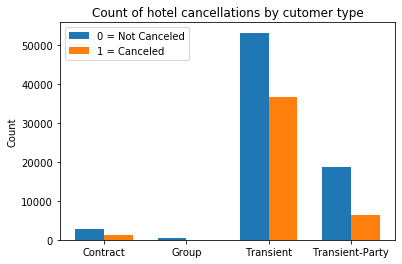

In [155]:
#visualize customer_type cancellation

#Sorted in this order: 'Contract', 'Group', 'Transient', 'Transient-Party'
labels = x_customer
cancel0_count = customer0_list
cancel1_count = customer1_list

x = np.arange(len(x_customer))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, cancel0_count, width, label='0 = Not Canceled')
rects2 = ax.bar(x + width/2, cancel1_count, width, label='1 = Canceled')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Count of hotel cancellations by cutomer type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

From the original dataset, 75% of the data were transient while 25% were transient-party

In [35]:
#Average hotel daily average rates per month by hotel
df2.groupBy('arrival_date_month','hotel').avg('adr').sort('arrival_date_month','hotel').show()

+------------------+------------+------------------+
|arrival_date_month|       hotel|          avg(adr)|
+------------------+------------+------------------+
|             April|  City Hotel|111.25183823529417|
|             April|Resort Hotel| 77.84949570518152|
|            August|  City Hotel|114.68045530446382|
|            August|Resort Hotel|186.79057417245596|
|          December|  City Hotel| 88.82630687318492|
|          December|Resort Hotel| 68.98422960725051|
|          February|  City Hotel|   85.088277945619|
|          February|Resort Hotel| 55.17193038994517|
|           January|  City Hotel| 82.62898554603844|
|           January|Resort Hotel|49.461883264933924|
|              July|  City Hotel|110.73429154302588|
|              July|Resort Hotel|155.18129892849268|
|              June|  City Hotel|119.07434127185242|
|              June|Resort Hotel|110.44474876847313|
|             March|  City Hotel| 92.64311551563952|
|             March|Resort Hotel|57.5201468824

In [42]:
#Hotel cancellation counts by hotel atype and month
df2.groupBy('arrival_date_month','hotel', 'is_canceled').count().sort('arrival_date_month','hotel', 'is_canceled').show()

+------------------+------------+-----------+-----+
|arrival_date_month|       hotel|is_canceled|count|
+------------------+------------+-----------+-----+
|             April|  City Hotel|          0| 4015|
|             April|  City Hotel|          1| 3465|
|             April|Resort Hotel|          0| 2550|
|             April|Resort Hotel|          1| 1059|
|            August|  City Hotel|          0| 5381|
|            August|  City Hotel|          1| 3602|
|            August|Resort Hotel|          0| 3257|
|            August|Resort Hotel|          1| 1637|
|          December|  City Hotel|          0| 2392|
|          December|  City Hotel|          1| 1740|
|          December|Resort Hotel|          0| 2017|
|          December|Resort Hotel|          1|  631|
|          February|  City Hotel|          0| 3064|
|          February|  City Hotel|          1| 1901|
|          February|Resort Hotel|          0| 2308|
|          February|Resort Hotel|          1|  795|
|           

In [161]:
months_label = [val.arrival_date_month for val in df2.select('arrival_date_month').distinct().collect()] 
months_label.sort()
months_label
#unordered original appeared months

['April',
 'August',
 'December',
 'February',
 'January',
 'July',
 'June',
 'March',
 'May',
 'November',
 'October',
 'September']

In [69]:
#reorder
months_label[0] = '04'
months_label[1] = '08'
months_label[2] = '12'
months_label[3] = '02'
months_label[4] = '01'
months_label[5] = '07'
months_label[6] = '06'
months_label[7] = '03'
months_label[8] = '05'
months_label[9] = '11'
months_label[10] = '10'
months_label[11] = '09'
months_label

['04', '08', '12', '02', '01', '07', '06', '03', '05', '11', '10', '09']

In [74]:
months_label.sort()
print(months_label)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']


In [75]:
#reorder2
months_label[0] = 'January'
months_label[1] = 'February'
months_label[2] = 'March'
months_label[3] = 'April'
months_label[4] = 'May'
months_label[5] = 'June'
months_label[6] = 'July'
months_label[7] = 'August'
months_label[8] = 'September'
months_label[9] = 'October'
months_label[10] = 'November'
months_label[11] = 'December'
months_label

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [157]:
months_cancel0 = df2_cancel0.groupBy('arrival_date_month').count().sort('arrival_date_month')
months_cancel0.show()

+------------------+-----+
|arrival_date_month|count|
+------------------+-----+
|             April| 6565|
|            August| 8638|
|          December| 4409|
|          February| 5372|
|           January| 4122|
|              July| 7919|
|              June| 6404|
|             March| 6645|
|               May| 7114|
|          November| 4672|
|           October| 6914|
|         September| 6392|
+------------------+-----+



In [159]:
months_cancel1 = df2_cancel1.groupBy('arrival_date_month').count().sort('arrival_date_month')
months_cancel1.show()

+------------------+-----+
|arrival_date_month|count|
+------------------+-----+
|             April| 4524|
|            August| 5239|
|          December| 2371|
|          February| 2696|
|           January| 1807|
|              July| 4742|
|              June| 4535|
|             March| 3149|
|               May| 4677|
|          November| 2122|
|           October| 4246|
|         September| 4116|
+------------------+-----+



In [158]:
month0_list = months_cancel0.select("count").rdd.flatMap(lambda x: x).collect()
month0_list

[6565, 8638, 4409, 5372, 4122, 7919, 6404, 6645, 7114, 4672, 6914, 6392]

In [160]:
month1_list = months_cancel1.select("count").rdd.flatMap(lambda x: x).collect()
month1_list

[4524, 5239, 2371, 2696, 1807, 4742, 4535, 3149, 4677, 2122, 4246, 4116]

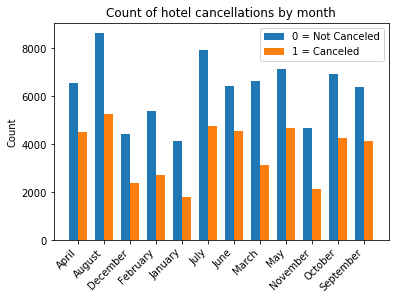

In [163]:
#visualize non cancellations by month

#These are unordered: April, August, December
#Only ordered alphabetically
labels = months_label
cancel0_count = month0_list
cancel1_count = month1_list

x = np.arange(len(months_label))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, cancel0_count, width, label='0 = Not Canceled')
rects2 = ax.bar(x + width/2, cancel1_count, width, label='1 = Canceled')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Count of hotel cancellations by month')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 45, ha="right")
ax.legend()

plt.show()

In [164]:
#Count of cancellations by hotel type and year
#2015-2017
df2.groupBy('arrival_date_year','hotel', 'is_canceled').count().sort('arrival_date_year','hotel', 'is_canceled').show()

+-----------------+------------+-----------+-----+
|arrival_date_year|       hotel|is_canceled|count|
+-----------------+------------+-----------+-----+
|             2015|  City Hotel|          0| 7678|
|             2015|  City Hotel|          1| 6004|
|             2015|Resort Hotel|          0| 6176|
|             2015|Resort Hotel|          1| 2138|
|             2016|  City Hotel|          0|22733|
|             2016|  City Hotel|          1|15407|
|             2016|Resort Hotel|          0|13637|
|             2016|Resort Hotel|          1| 4930|
|             2017|  City Hotel|          0|15817|
|             2017|  City Hotel|          1|11691|
|             2017|Resort Hotel|          0| 9125|
|             2017|Resort Hotel|          1| 4054|
+-----------------+------------+-----------+-----+



In [37]:
#count of cancellation by hotel
df2.groupBy('hotel').count().select('hotel', f.col('count')).show()

+------------+-----+
|       hotel|count|
+------------+-----+
|  City Hotel|79330|
|Resort Hotel|40060|
+------------+-----+



In [38]:
#Get counts of cancel or not cancel by hotel type
resort_0 = df2.filter((col('hotel') == 'Resort Hotel') & (col('is_canceled') == 0)).count()
resort_1 = df2.filter((col('hotel') == 'Resort Hotel') & (col('is_canceled') == 1)).count()
city_0 = df2.filter((col('hotel') == 'City Hotel') & (col('is_canceled') == 0)).count()
city_1 = df2.filter((col('hotel') == 'City Hotel') & (col('is_canceled') == 1)).count()

In [39]:
#cancellations by hotel type in dataframe
df2.groupBy('hotel', 'is_canceled').count().show()

+------------+-----------+-----+
|       hotel|is_canceled|count|
+------------+-----------+-----+
|Resort Hotel|          0|28938|
|  City Hotel|          0|46228|
|Resort Hotel|          1|11122|
|  City Hotel|          1|33102|
+------------+-----------+-----+



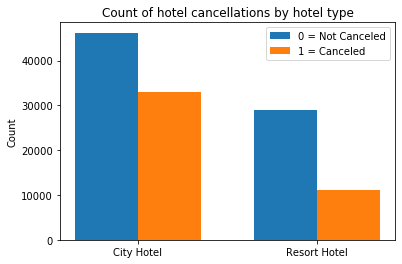

In [139]:
#to visualize, we use matplotlib
#Hotel cancellations by hotel type


#y_iscancel = [val.is_canceled for val in df2.select('is_canceled').distinct().collect()]   #gets [0,1]
x_hoteltype = [val.hotel for val in df2.select('hotel').groupBy('hotel').count().collect()]

labels = ['City Hotel', 'Resort Hotel']
cancel0_count = [city_0, resort_0]
cancel1_count = [city_1, resort_1]

x = np.arange(len(x_hoteltype))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, cancel0_count, width, label='0 = Not Canceled')
rects2 = ax.bar(x + width/2, cancel1_count, width, label='1 = Canceled')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Count of hotel cancellations by hotel type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [40]:
# for 'meal': 
#undefined/SC are same, they mean no meal package. 
#BB: is bed&breakfast
#HB: half board, is breakfast and dinner
#FB: full board, is full breakfast lunch and dinner

# replace Undefined with SC in meal package
df2 = df2.replace('Undefined', 'SC')

# see value counts for 'meal'
df2.groupBy('hotel','meal').count().sort('hotel', 'meal').show()

+------------+----+-----+
|       hotel|meal|count|
+------------+----+-----+
|  City Hotel|  BB|62305|
|  City Hotel|  FB|   44|
|  City Hotel|  HB| 6417|
|  City Hotel|  SC|10564|
|Resort Hotel|  BB|30005|
|Resort Hotel|  FB|  754|
|Resort Hotel|  HB| 8046|
|Resort Hotel|  SC| 1255|
+------------+----+-----+



helpful links:
- https://spark.apache.org/docs/latest/ml-guide.html 
- https://runawayhorse001.github.io/LearningApacheSpark/exploration.html
- https://github.com/Bergvca/pyspark_dist_explore


### Modeling

We will need to include

a) Evaluate metrics
- For classificaiton,
        - accuracy
        - precision, recall, F1 score
        - confusion matrix
        - area under the ROC curve (AUROC)
        
b) Sensitivity analysis

Sensitivity analysis measures the effect of changing the model inputs or parameters. For example, if
the model uses a hyperparameter C, how does AUROC change when feature X is increased/decreased
by one standard deviation. The hope is that sensitivity is low.

#### Benchmark or Simple Model

We will use logistic regression to predict whether patrons will  cancel their hotel bookings

First, we test using logistic regression on just one feature

In [ ]:
# load modules
import pandas as pd
import pyspark.sql.functions as F
import pyspark.mllib.regression as reg
from pyspark.mllib.classification import LogisticRegressionWithLBFGS
from pyspark.mllib.evaluation import BinaryClassificationMetrics

In [ ]:
# narrow the list of features for modeling
vars_to_keep = ['hotel',
                ...]
data_rdd2 = data_rdd.select([is_canceled]+vars_to_keep)

In [ ]:
iterations = 10
#target = is_canceled

In [29]:
# Show some rows to be sure things look ok.
data_rdd.show(5)

NameError: name 'data_rdd' is not defined

In [93]:
#code for defining AUC for classfication (taken from last breast cancer assignment)

def compute_univariate_aucs(df, target, training_fraction, iters, seed):

    # split the data into train/test using seed
    data_train, data_test = df.randomSplit(training_fraction, seed)
    
    # list of predictor variables
    vars = vars_to_keep
    
    # results storage
    df_auc = pd.DataFrame(index=vars, columns=['weight','auroc'])    

    for v in vars:    
        print('=== analysis of variable: {}'.format(v))

        # create train and test dataframes with columns: target, v
        datai_tr = data_train.select([target]+[v])
        datai_te = data_test.select([target]+[v])

        # cast to LabeledPoint
        # train
        datai_tr_lp = datai_tr \
                     .rdd \
                     .map(lambda row: reg.LabeledPoint(row[0], row[1:]))
        
        # test
        datai_te_lp = datai_te\
                      .rdd\
                      .map(lambda row: reg.LabeledPoint(row[0], row[1:]))

        # train logistic regression, setting iterations, including intercept
        LR_Model = LogisticRegressionWithLBFGS.train(datai_tr_lp, iterations=iters, intercept=True)

        # from test set, zip labels with predicted labels and cast to float
        #p.label    # gives label
        #p.features # gives features
        #comment out because following results say 'p is not defined'
        
        act_pred_test_set = datai_te_lp.map(lambda p: (p.label, LR_Model.predict(p.features))) \
                                            .map(lambda row: (row[0], row[1] * 1.0))
        
        metrics = BinaryClassificationMetrics(act_pred_test_set)
        # metrics.areaUnderROC
        
        df_auc['weight'].loc[v] = LR_Model.weights  # store the weights
        df_auc['auroc'].loc[v] = metrics.areaUnderROC # extract AUROC
        print('=== completed analysis of variable: {}'.format(v))
        
    df_auc.sort_values(by='auroc', ascending=False, inplace=True)
    
    return df_auc

In [ ]:
#not downsample dataframe using ITERS and SEED that was defined
compute_univariate_aucs(data_rdd2, is_canceled, training_fraction, ITERS, SEED)

#### Champion or Sophisticated Model